In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import plotly.express as px


### Load the dataset

# Understanding Dataset Features

Below is a summary of the key features included in the dataset and their descriptions:

| **Feature**                 | **Description**                                                                                                                                       |
|-----------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Timestamp**               | A record of the date and time when an observation or data point was recorded regarding someone's mental health.                                      |
| **Gender**                  | The classification of a person as male or female.                                                                                                    |
| **Country**                 | The country where a person lives, which is relevant because mental health resources and cultural attitudes can vary by location.                       |
| **Occupation**              | A person's usual or principal work or business, which can influence stress levels and access to mental health resources.                                |
| **Self-employed**           | Indicates whether a person is self-employed or running their own business, rather than working for an employer.                                        |
| **Family history**          | A record of a person's family relationships and medical histories, including any family history of mental health issues that might indicate genetic or environmental factors. |
| **Treatment**               | Indicates whether a person is currently undergoing treatment for mental health issues.                                                               |
| **Growing Stress**          | Indicates whether a person's stress level is increasing over time.                                                                                   |
| **Changes Habits**          | Refers to changes in behavior or habits that may signal shifts in mental health.                                                                      |
| **Mental_Health_History**   | A record of a person's past mental health diagnoses, treatments, or issues.                                                                          |
| **Mood_Swings**             | Fluctuations in a person's mood, which can be indicative of various mental health conditions.                                                         |
| **Coping_Struggles**        | Difficulties a person may face in coping with stressors or mental health challenges.                                                                 |
| **Work_Interest**           | The level of interest or engagement a person has in their work or activities, which can be influenced by their mental health.                           |
| **Social_Weakness**         | Difficulties or challenges in social interactions or maintaining relationships, potentially impacted by mental health issues.                         |
| **Mental_Health_Interview** | May refer to a structured interview or assessment conducted to evaluate mental health.                                                               |
| **Care_Options**            | Options available for seeking care or treatment for mental health issues, such as therapy, medication, or support groups.                               |


[Mental Health Dataset](https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset)

In [70]:
df = pd.read_csv('/content/Mental Health Dataset.csv')

### Basic information about the dataset


In [71]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social

In [72]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


### Checking for missing values

In [73]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing Values Summary:")
print(missing_df[missing_df['Missing Values'] > 0])


Missing Values Summary:
               Missing Values  Percentage
self_employed            5202    1.779289


### Visualizing missing values using missingno

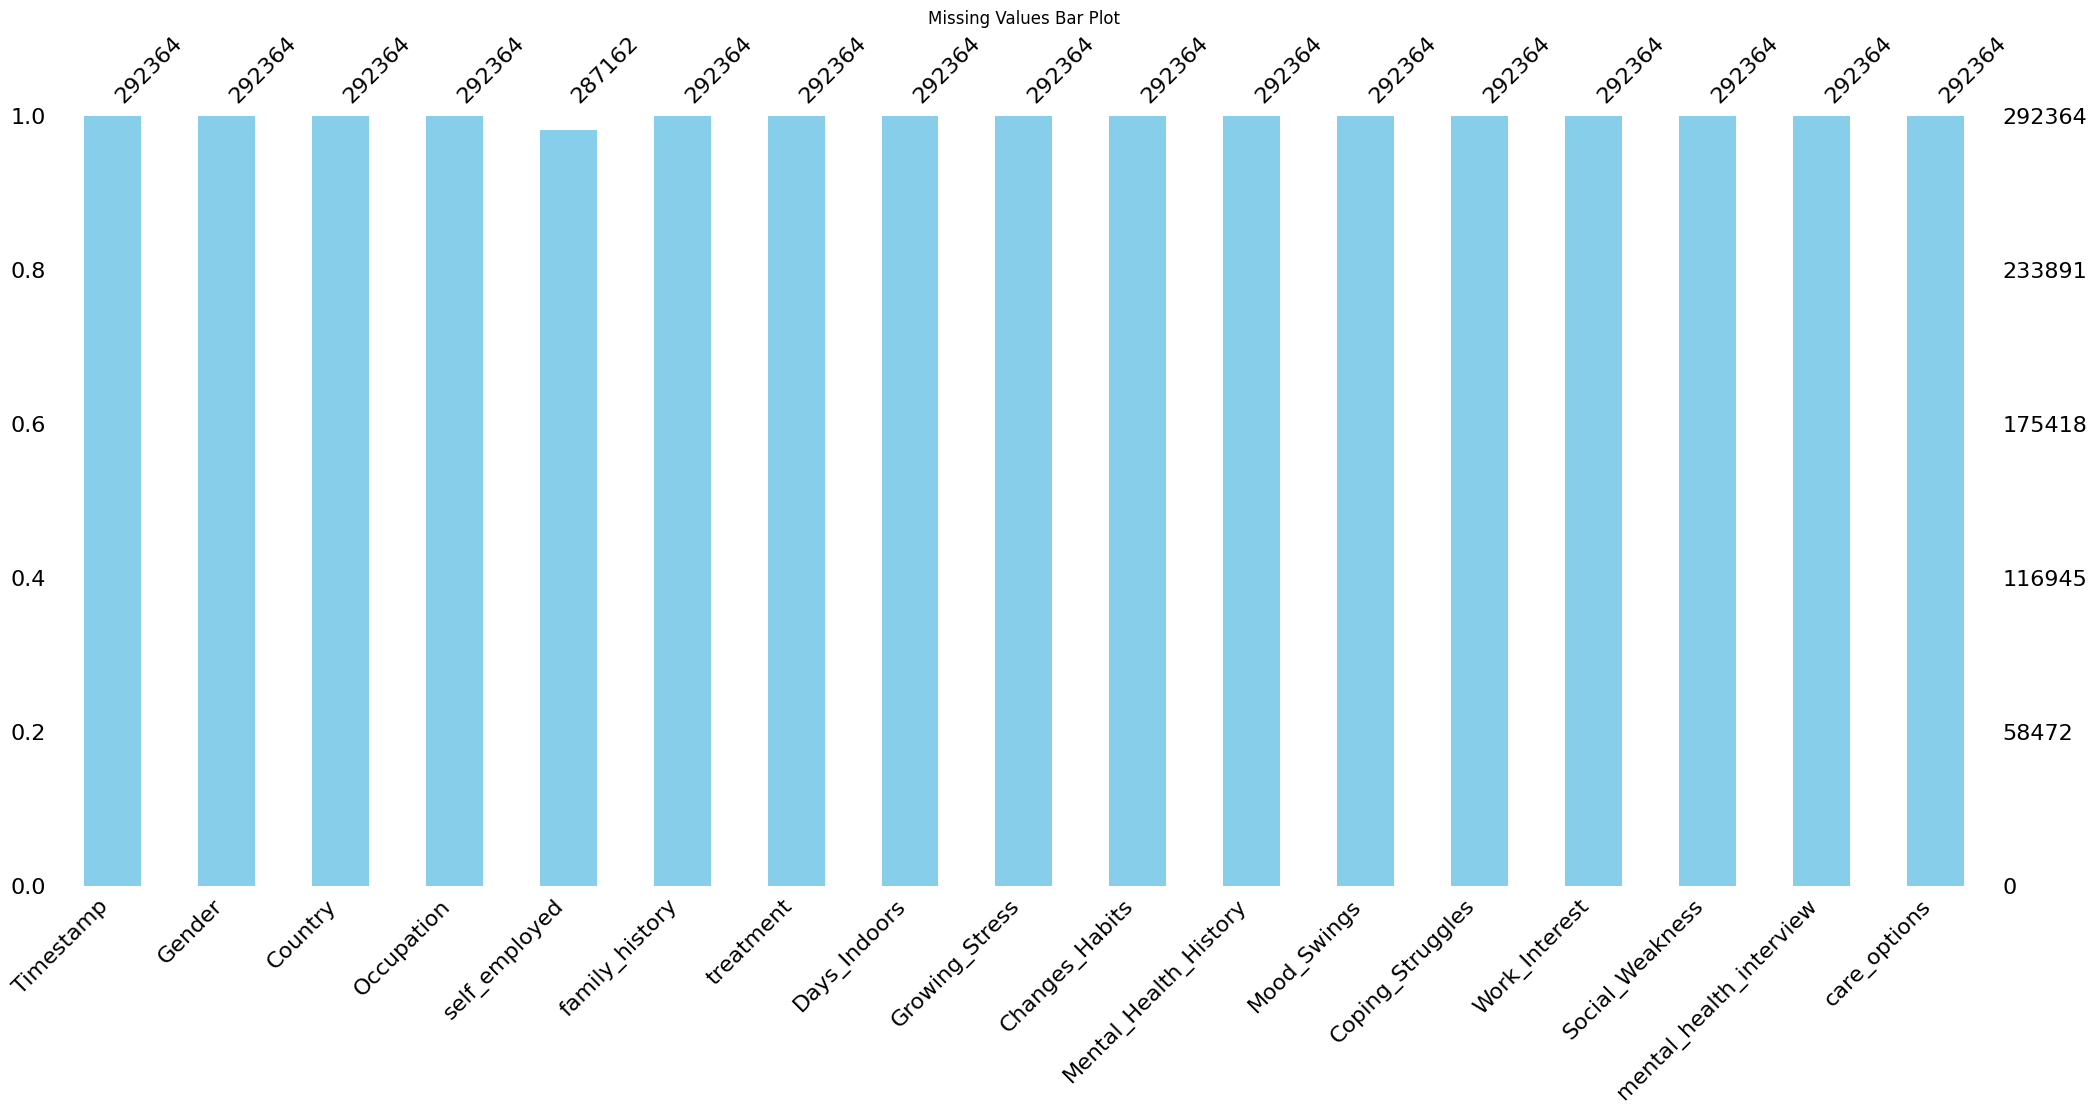

In [74]:
plt.figure(figsize=(10, 6))
msno.bar(df, color='skyblue')
plt.title("Missing Values Bar Plot")
plt.show()

<Figure size 1000x600 with 0 Axes>

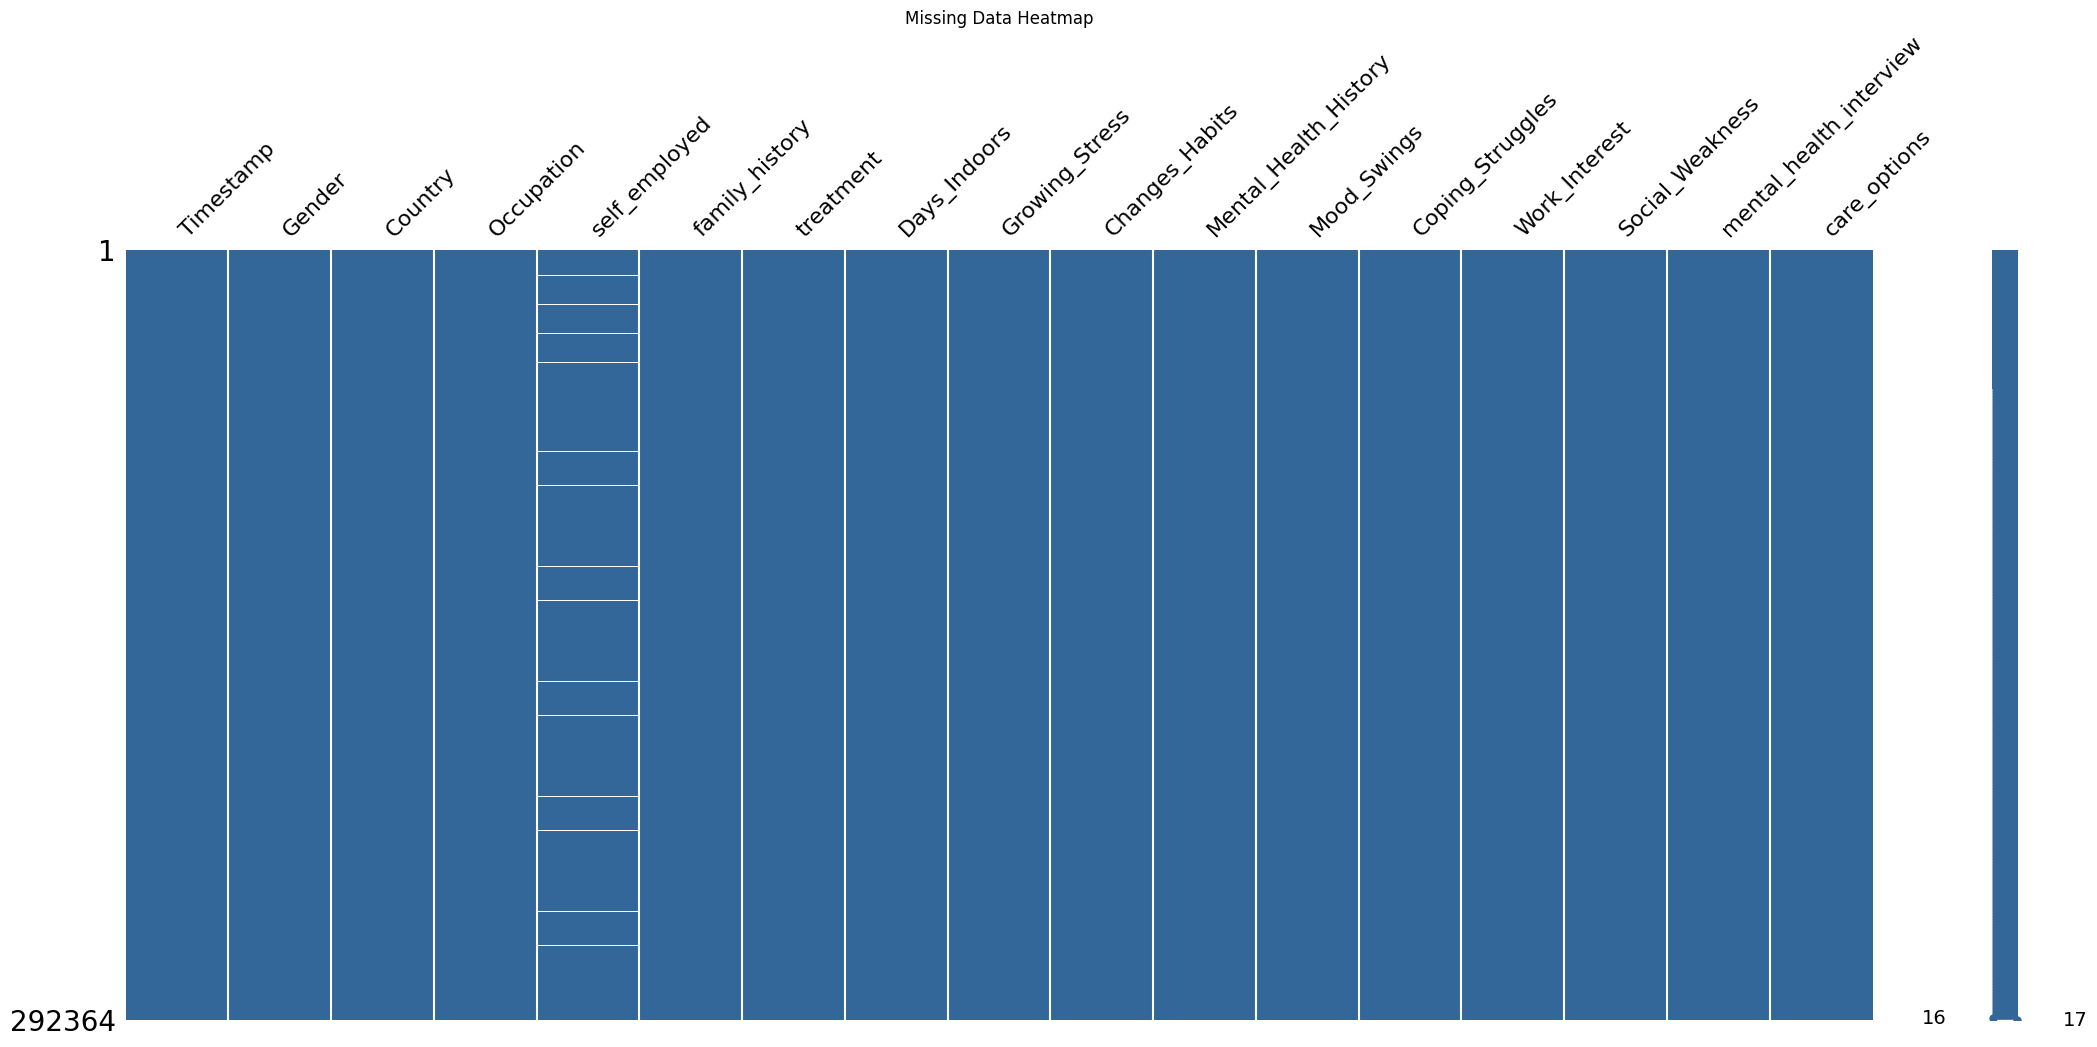

In [75]:
plt.figure(figsize=(10, 6))
msno.matrix(df, color=(0.2, 0.4, 0.6))
plt.title("Missing Data Heatmap")
plt.show()

In [76]:
# fill the null values
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])
df

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


### Unique values

In [77]:
df.nunique()

,0
Timestamp,580
Gender,2
Country,35
Occupation,5
self_employed,2
family_history,2
treatment,2
Days_Indoors,5
Growing_Stress,3
Changes_Habits,3


### Check the duplicate values


In [78]:
print('Known observations:', len(df.index))
print('Unique observations:',len(df.drop_duplicates().index))
df.duplicated().sum()

Known observations: 292364
Unique observations: 290051


np.int64(2313)

### Drop the duplicated rows

In [79]:
df.drop_duplicates(inplace = True)

In [80]:
df.describe().T

,count,unique,top,freq
Timestamp,290051,580,8/27/2014 11:43,2381
Gender,290051,2,Male,237900
Country,290051,35,United States,169112
Occupation,290051,5,Housewife,65906
self_employed,290051,2,No,260904
family_history,290051,2,No,175518
treatment,290051,2,Yes,146184
Days_Indoors,290051,5,1-14 days,63113
Growing_Stress,290051,3,Maybe,99300
Changes_Habits,290051,3,Yes,108788


### Correlation matrix


In [81]:
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_encoded[col] = pd.factorize(df_encoded[col])[0]

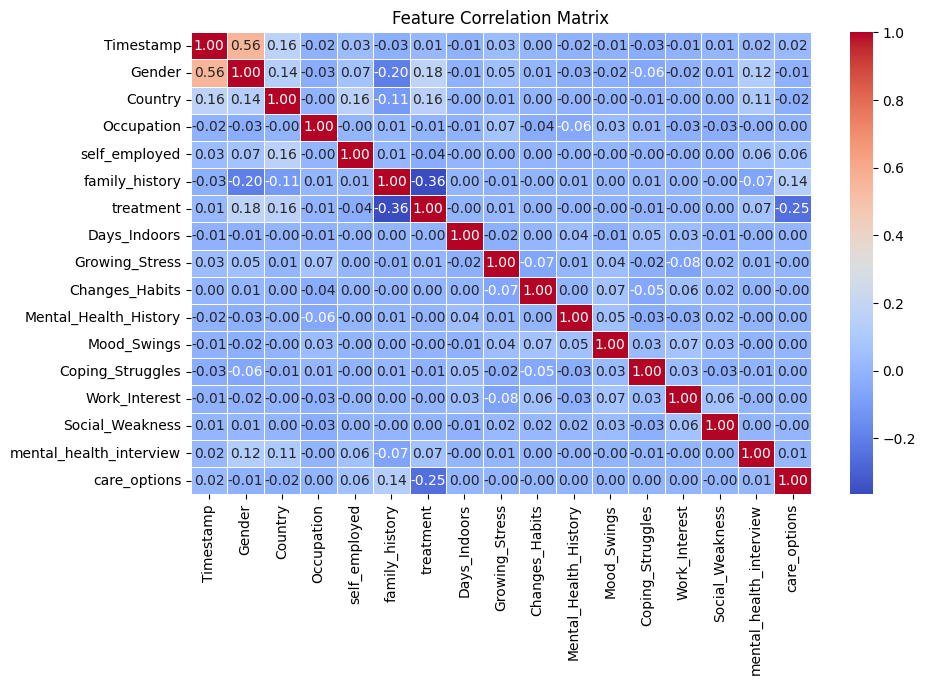

In [82]:
plt.figure(figsize=(10, 6))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

### Plot distributions for each column

In [83]:
# def plot_distribution(column_name, rotation=0):
#     plt.figure(figsize=(10, 6))
#     sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index, hue=column_name, palette='coolwarm', legend=False)
#     plt.xticks(rotation=rotation)
#     plt.title(f'Distribution of {column_name}')
#     plt.grid(True, linestyle='--', alpha=0.6)
#     plt.show()

In [84]:
def plot_distribution(column_name, rotation=0):
    counts = df[column_name].value_counts().reset_index()
    counts.columns = [column_name, 'count']

    fig = px.bar(
        counts,
        x=column_name,
        y='count',
        color=column_name,
        title=f'Distribution of {column_name}',
        hover_data={column_name: True, 'count': True},
        color_discrete_sequence=px.colors.qualitative.Pastel
    )

    fig.update_layout(
        xaxis_tickangle=rotation,
        showlegend=False
    )
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')

    fig.show()

In [85]:
plot_distribution("Gender")

Most of the data in the dataset is about males.


In [86]:
plot_distribution("Country", rotation=-90)

Approximately 70 percent of the population details are concentrated in the countries of the United States and the United Kingdom.


In [87]:
plot_distribution("Occupation")

Housewives form the largest occupational group in the dataset, followed by students and corporate professionals. 'Others' and business roles make up smaller portions of the sample.

In [88]:
plot_distribution("self_employed")

The vast majority are not self-employed, with only a small fraction indicating self-employment.

In [89]:
plot_distribution("family_history")

Most do not report a family history of mental health issues, while a notable share does.

In [90]:
plot_distribution("treatment")

Slightly more respondents are receiving treatment than not.

In [91]:
plot_distribution("Days_Indoors")

A plurality of respondents spent only 1–14 days indoors, while fewer either stayed indoors for longer periods or went out daily.

In [92]:
plot_distribution("Growing_Stress")

Most respondents are uncertain about rising stress, with a large number confirming it and fewer indicating no increase.

In [93]:
plot_distribution("Changes_Habits")

Many respondents acknowledge changes in habits, while a sizable portion is uncertain, and fewer report no changes.

In [94]:
plot_distribution("Mental_Health_History")

Most respondents report no mental health history, with a considerable group unsure and a smaller share confirming a history.

In [95]:
plot_distribution("Mood_Swings")

Medium mood swings are most common, followed by low and then high swings.

In [96]:
plot_distribution("Coping_Struggles")

In [97]:
plot_distribution("Work_Interest")

Most respondents report a lack of interest in work ('No'), with a significant portion expressing uncertainty ('Maybe') and fewer indicating a clear interest.

In [98]:
plot_distribution("Social_Weakness")

Many respondents are uncertain about their social weakness ('Maybe'), followed by those who do not perceive any weakness and then those who do.

In [99]:
plot_distribution("mental_health_interview")

A large majority has not had a mental health interview, with only a small fraction reporting a definitive interview.

In [100]:
plot_distribution("care_options")

Most respondents indicate they do not have care options, while a notable portion reports having them and some remain uncertain.

In [101]:
def plot_grouped_bar(x, hue, rotation=0):
    grouped = df.groupby([x, hue]).size().reset_index(name='count')

    fig = px.bar(
        grouped,
        x=x,
        y='count',
        color=hue,
        barmode='group',
        title=f'Grouped Bar Chart: {x} - {hue}',
        hover_data={x: True, hue: True, 'count': True},
        color_discrete_sequence=px.colors.qualitative.Pastel
    )

    fig.update_layout(
        xaxis_tickangle=rotation,
        showlegend=True
    )
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')

    # Display the figure
    fig.show()


### Mental Health & Treatment Analysis

In [102]:
plot_grouped_bar("Gender", "treatment")  # Gender-wise mental health treatment

Male respondents far outnumber females, with a nearly even split between 'Yes' and 'No' treatment. Among females, a higher proportion is receiving treatment compared to those who are not.

In [103]:
plot_grouped_bar("Country", "treatment", rotation=-90)  # Country-wise mental health treatment

The US dominates the dataset, with slightly more respondents receiving treatment than not. The UK also has a sizable sample, though the distribution between 'Yes' and 'No' treatment is more evenly balanced.

In [104]:
plot_grouped_bar("Mental_Health_History", "treatment")

Those with a definite mental health history ('Yes') show a near balance between receiving and not receiving treatment. Respondents unsure about their history ('Maybe') are also split, suggesting uncertainty does not strongly influence treatment decisions.

### Behavioral & Psychological Insights

In [105]:
plot_grouped_bar("Mood_Swings", "Growing_Stress")

Respondents with medium mood swings are most likely to report growing stress ('Yes'). High mood swings show more uncertainty ('Maybe'), while low mood swings appear more evenly distributed across all stress responses.

In [106]:
plot_grouped_bar("Coping_Struggles", "Changes_Habits")

Whether or not respondents struggle with coping, many still report changes in habits. This suggests that shifts in daily routines may occur independently of perceived coping ability.

In [107]:
plot_grouped_bar("Social_Weakness", "mental_health_interview")

Respondents who are uncertain ('Maybe') about their social weakness predominantly report no mental health interview, while those denying social weakness lean toward having one. Individuals acknowledging social weakness ('Yes') are more evenly split between 'Yes' and 'No' interviews

### Work & Stress Factors

In [108]:
plot_grouped_bar("self_employed", "Work_Interest")

In [109]:
plot_grouped_bar("Occupation", "Growing_Stress")

Across all occupations, 'Maybe' is the most frequent response, suggesting uncertainty about rising stress. Students, however, display a higher 'Yes' rate, indicating more definitive stress concerns.

In [110]:
plot_grouped_bar("Days_Indoors", "Mood_Swings")

Those who stayed indoors for shorter periods (1-14 days) show a higher proportion of 'High' mood swings. As days indoors increase or if they go out daily, 'Medium' mood swings become more common.

In [111]:
plot_grouped_bar("Gender", "Growing_Stress")

Most males in the dataset report growing stress, with a high likelihood of it being a "Maybe".

Females in the dataset have a high likelihood of experiencing growing stress.


## Summary of Key Findings

- **Geographic & Demographic Skew:** The dataset is heavily skewed toward the US and UK, with a higher number of male respondents than female.  
- **Treatment Patterns:** Slightly more people are receiving treatment than not, but many remain uncertain about care options or have never had a mental health interview.  
- **Occupational Insights:** Housewives form the largest group, followed by students and corporate roles, suggesting a broad range of life situations impacting mental health.  
- **Stress & Mood:** A large portion of respondents report medium mood swings and uncertainty about rising stress, reflecting possible gaps in self-awareness or resources.  
- **Lifestyle Changes:** Many respondents acknowledge changes in habits, indicating that day-to-day routines and coping mechanisms may be shifting regardless of perceived coping ability.  
- **Family & Personal History:** While most do not report a family history of mental health issues, a notable number remain uncertain about their own history, highlighting potential underdiagnosis or lack of formal evaluation.

Overall, the data suggests that mental health concerns span diverse demographics and lifestyles, with significant uncertainty around diagnosis, treatment, and self-awareness. While many individuals do seek treatment, barriers such as stigma, limited resources, or personal uncertainty may still impede broader engagement in mental health care.
